In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

'''Read the data from the table "Birth rate in the regions of Ukraine (1950—2019)"'''

tmp = pd.read_html("https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C")

a = tmp[12].head()
print(a)

             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —


(28, 9)
               Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126    —    —
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82    —
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6        Закарпатська  314.0  273.0  207.0   168   115   151  146  104
7          Запорізька  219.0  197.0  150.0   124    71   106  106   68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122   88
9            Київська  204.0  189.0  156.0   123    73   122  121   80
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108   68
11          Луганська  262.0  235.0  144.0   116    62    96   51    —
12          Львівська  234.0  240.0  171.0   140    91   119  119   8

C:\Users\Zhanna\AppData\Local\Temp\ipykernel_10324\1371590901.py:34: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  missng_d = a.fillna(a.mean(), inplace=False)


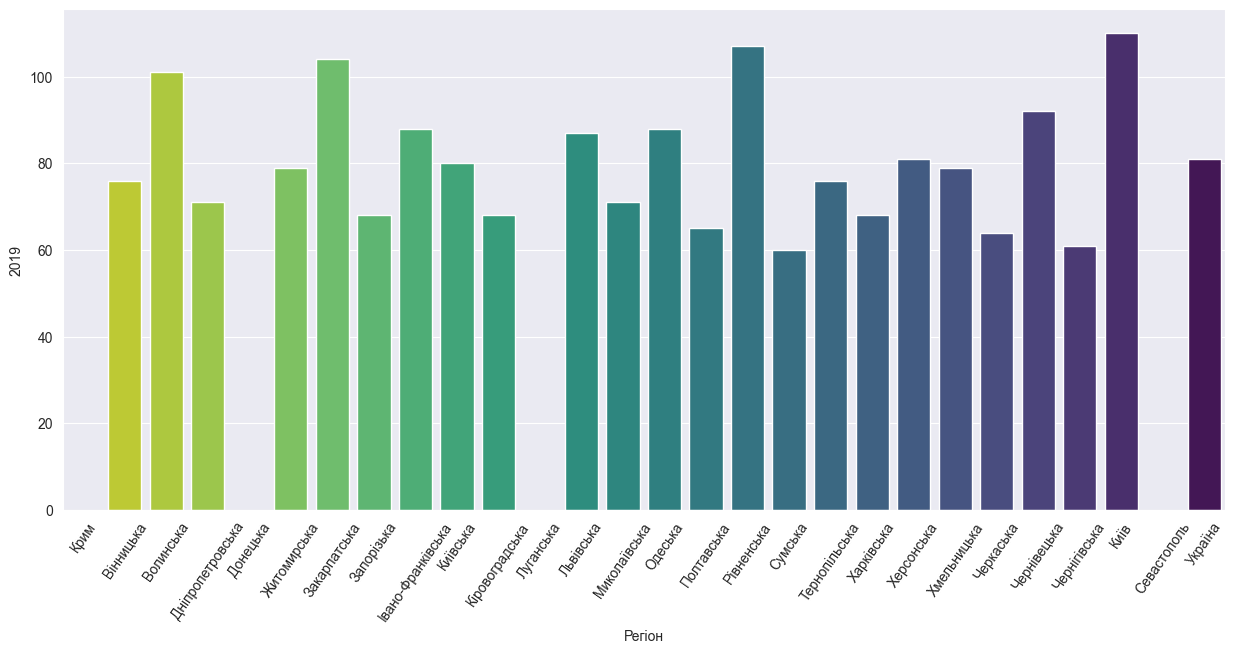

In [2]:
'''Determine the number of rows and columns in the dataframe'''
a = tmp[12]
num_rows = a.shape
print(num_rows)

'''Replace the "—" value in the table with the NaN value'''
chang_nn = a.fillna(0, inplace=False)
print(chang_nn)
b = a.replace ( r'^\s\*$' , np.nan , regex= True )
print(b)

'''Define the types of all columns'''
datatypes = a.dtypes 
print(datatypes)

'''Replace non-numeric column types with numeric ones'''
cols = ['2019', '2014']
a[cols] = a[cols].replace(r'\D', '', regex=True).apply(pd.to_numeric, errors='coerce')
print(a)
print(datatypes)

'''Calculate the proportion of gaps in each column'''
portion = a.isnull().sum()
print(portion)

'''Remove from the table the data for the entire country, the last row of the table'''
rem = a.drop(labels = [27],axis = 0)
print(rem)

'''Replace missing data in columns with the average values of those columns'''
missng_d = a.fillna(a.mean(), inplace=False)
print(missng_d)

'''Get a list of regions where the birth rate in 2019 was higher than the average for Ukraine'''
ls_regions = a[ a['2019'] > a['2019'].mean()] [['Регіон', '2019'] ]
fnc_reg = ls_regions.groupby('2019').max()
print(fnc_reg)

'''the highest birth rate in 2014'''
agg_func_math = {
    'Регіон': ['max']
}
birthrate = a.groupby(['2014']).agg(agg_func_math).round(1)
print(birthrate.max())

'''bar chart of birth rates by region in 2019'''
plt.figure(figsize=(15,6.5))
sns.set_style('darkgrid')
g = sns.barplot(data=a, x='Регіон', y='2019', palette='viridis_r')
g.set_xticklabels(a['Регіон'], rotation=55, fontdict={'fontsize':10})
plt.show()